---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [13]:
def answer_one():
    df = pd.read_csv('fraud_data.csv')
    tab = df['Class'].value_counts()
    return tab[1]/tab.sum()

answer_one()

0.016410823768035772

In [14]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [24]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score, accuracy_score
    dummy_major = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    dummy_predictions = dummy_major.predict(X_test)
    acc = accuracy_score(y_test, dummy_predictions)
    rec = recall_score(y_test, dummy_predictions)
    return (acc, rec)

answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [27]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score, accuracy_score
    from sklearn.svm import SVC

    svm = SVC().fit(X_train, y_train)
    svm_predicted = svm.predict(X_test)
    rec = recall_score(y_test, svm_predicted)
    pre = precision_score(y_test, svm_predicted)
    acc = accuracy_score(y_test, svm_predicted)
    return (acc, rec, pre)

answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [45]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    svm = SVC(kernel = 'rbf',C = 1e9, gamma = 1e-07).fit(X_train, y_train)
    y_SVM = svm.decision_function(X_test)
    # show the decision_function scores for first 20 instances
    #print(list(zip(y_test[0:20], y_SVM[0:20])))
    y_SVM = svm.decision_function(X_test) > -220
    y_SVM = y_SVM.astype(int)
    confusion = confusion_matrix(y_test, y_SVM) 
    return confusion

answer_four()

array([[5320,   24],
       [  14,   66]], dtype=int64)

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

<IPython.core.display.Javascript object>


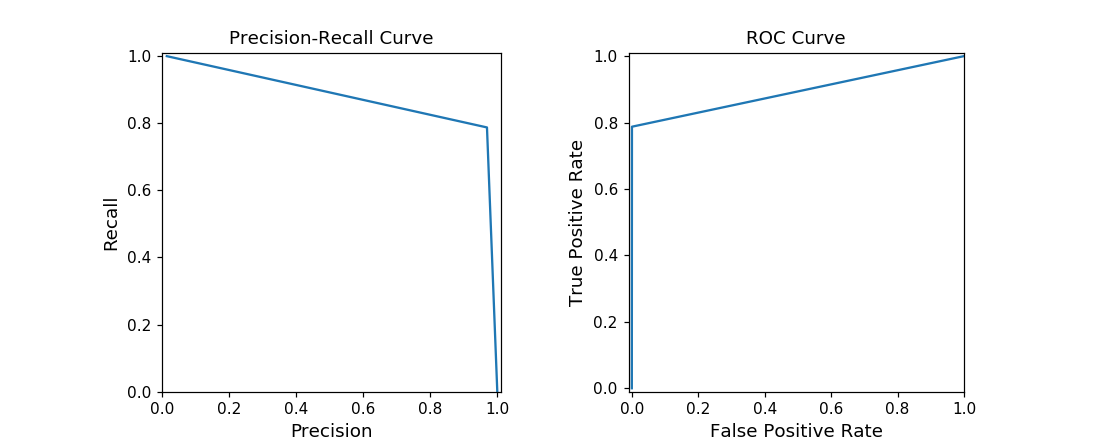

In [126]:
def plot_curves():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    logr = LogisticRegression(max_iter=10000).fit(X_train, y_train)
    logr_predicted = logr.predict(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, logr_predicted)
    fpr_lr, tpr_lr, _ = roc_curve(y_test, logr_predicted)
    
    plt.figure(figsize=(10,4))
    ax1 = plt.subplot(1, 2, 1)
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(precision, recall)
    plt.xlabel('Precision', fontsize=12)
    plt.ylabel('Recall', fontsize=12)
    ax1.set_title('Precision-Recall Curve')
    ax1.axes.set_aspect('equal')
    
    ax2 = plt.subplot(1, 2, 2)
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_lr, tpr_lr)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    ax2.set_title('ROC Curve')
    ax2.axes.set_aspect('equal')

plot_curves()

In [62]:
def answer_five():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve
    
    logr = LogisticRegression(max_iter=10000).fit(X_train, y_train)
    logr_predicted = logr.decision_function(X_test)
    precision, recall, a = precision_recall_curve(y_test, logr_predicted)
    fpr, tpr, b = roc_curve(y_test, logr_predicted)
    
    pre_pos = np.argmin(np.abs(precision-0.75))
    rec_value = recall[pre_pos]
    fpr_pos = np.argmin(np.abs(fpr-0.16))
    tpr_value = tpr[fpr_pos]
    return (rec_value,tpr_value)

answer_five()

(0.825, 0.925)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array.*

In [121]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    log = LogisticRegression(max_iter=10000,solver='liblinear')
    grid_values = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
    grid_lr = GridSearchCV(log, param_grid = grid_values, scoring = 'recall', cv=3)
    grid_lr.fit(X_train, y_train)
    idx = pd.MultiIndex.from_arrays([grid_lr.cv_results_['param_C'].tolist(),grid_lr.cv_results_['param_penalty'].tolist()])
    df = pd.Series(grid_lr.cv_results_['mean_test_score'].tolist(), index=idx)
    df = df.unstack()    
    return np.array(df)

answer_six()

array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ],
       [0.80797101, 0.8115942 ]])

<IPython.core.display.Javascript object>


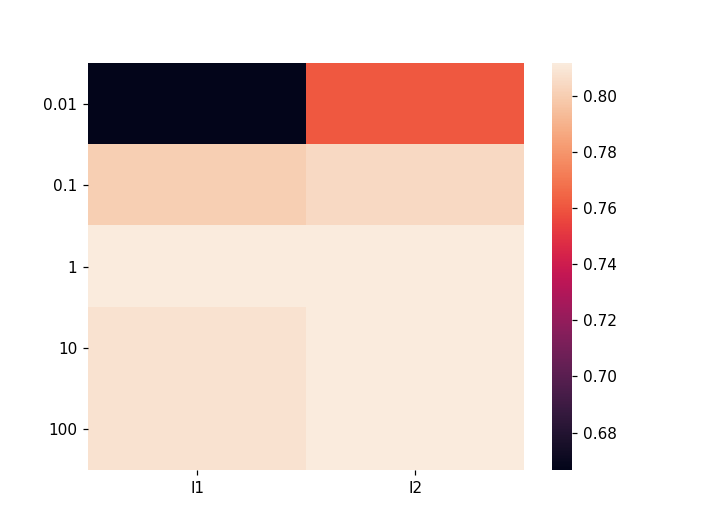

In [127]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())